# Plot the incidences
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.
The following code creates multiple plots out of the data to give a rough overview of the possibilities.

## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# Used to navigate the directories and check for files
import os
# backup directory of this file, because the working directory is changed to save files
plot_incidences_directory = os.getcwd()

# to calculate squarerott and scale incidences
import math

## Get the Data
Read the file ["Readme.ipynb"](Readme.ipynb) or check out the files ["get_data.ipynb"](get_data.ipynb) and ["get_geographical_data_of_german_counties.ipynb"](get_geographical_data_of_german_counties.ipynb) for more information about the data collection.

In [2]:
os.chdir("..")   # move one directory up
%run color_scheme.ipynb
os.chdir("collect_data")   # move to the cllect_data directory
%run get_data.ipynb
os.chdir(plot_incidences_directory)    # return to original directory

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!


## Plots


### Number of Seven Days Incidences
Plots all seven days incidences of all days availlable.<br/>
Is used to get a feeling of how many incidences are above certain thresholds and which ranges contain solid data and which are statistical noise.
<br/><br/>
In the first cell below, the user can set the range of plotted incidences and multiple horizontal lines which help the user to more easily read the data.

In [3]:
range_of_incidences = (350, 100000)    # the seven days incidence cannot get above 100,000
draw_horizontal_line_in_plot_at_position = [400, 500, 600]

In [4]:
incidences_in_range = list()
for countys_series_of_incidences in [county['incidences'] for county in covid19.values()]:
    for incidence in countys_series_of_incidences:
        if incidence > range_of_incidences[0] and incidence < range_of_incidences[1]:
            incidences_in_range.append(incidence)
incidences_in_range.sort()

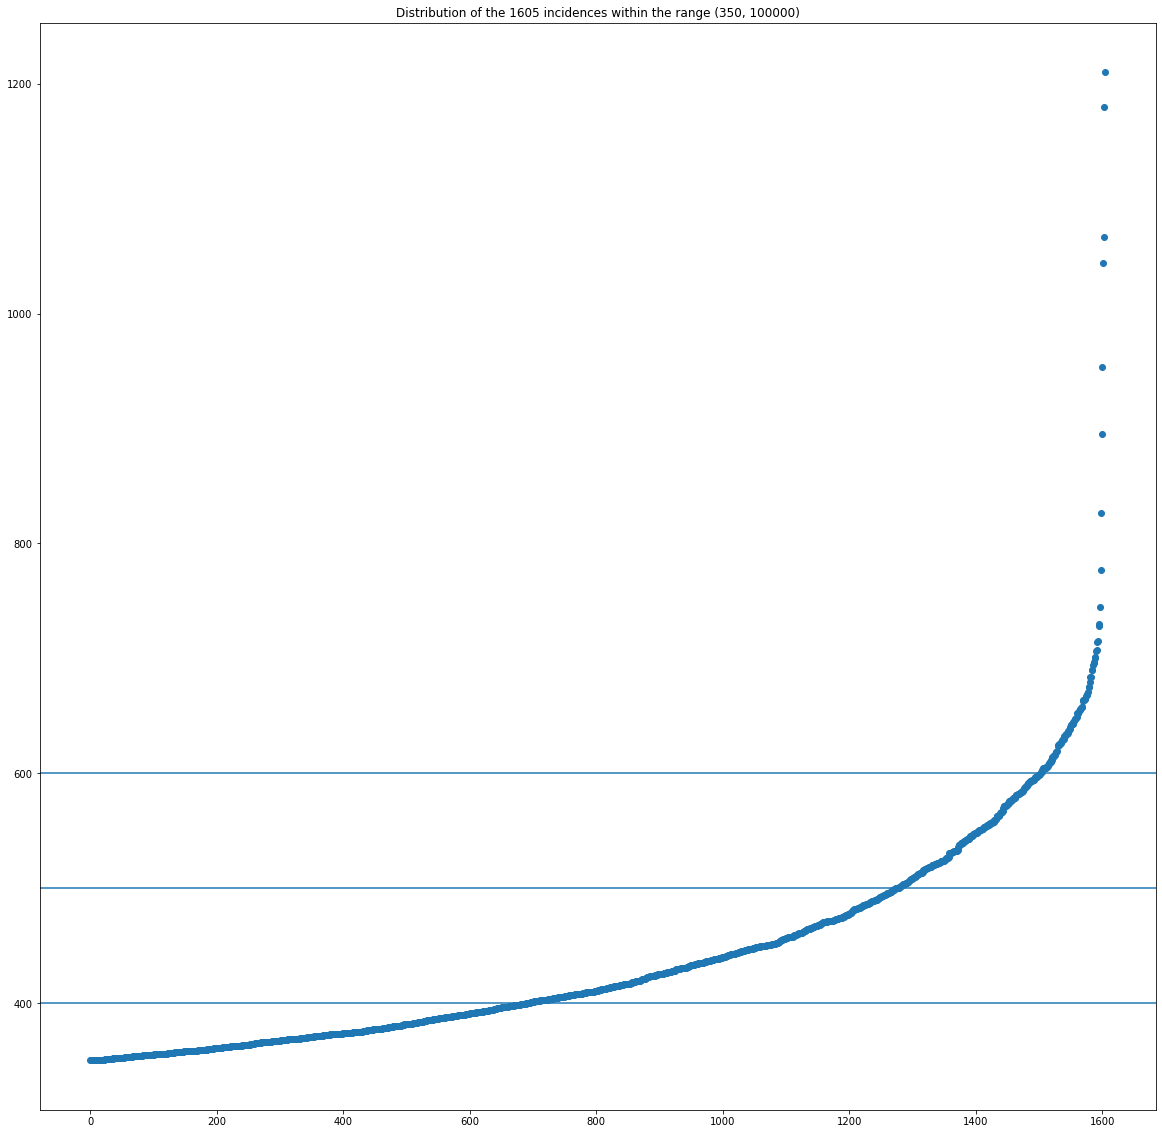

In [5]:
plt.figure(figsize=(20, 20))    # initiate and enlarge plot
for yvalue in draw_horizontal_line_in_plot_at_position:
    plt.axhline(yvalue)
plt.title("Distribution of the {} incidences within the range {}".format(
           len(incidences_in_range), range_of_incidences))
plt.scatter([e for e in range(len(incidences_in_range))], incidences_in_range)
plt.show()

### Incidences Sorted by Federal States
The series of the seven days incidence of every county are plotted into 16 plots: Sorted by the federal state the county is located in.
<br/><br/>
This process is also used to check that every county is related to one federal state:<br/>
The AdmUnitIDs of the counties (Gemeindeschlüssel) are copied to "covid19_copy".
The AdmUnitID of every county found with the state identifier is removed from the "covid19_copy". If any AdmUnitIDs remain in the end, an alert is triggered.

In [6]:
firsts_of_month_UTC = list()
firsts_of_month_unixtime = list()
for date_index in range(len(non_county_specific_data['UTC'])):
    if non_county_specific_data['UTC'][date_index][:3] == "01.":
        firsts_of_month_UTC.append(non_county_specific_data['UTC'][date_index][:6]+"\n"+
            non_county_specific_data['UTC'][date_index][6:])
        firsts_of_month_unixtime.append(non_county_specific_data['unixtime'][date_index])

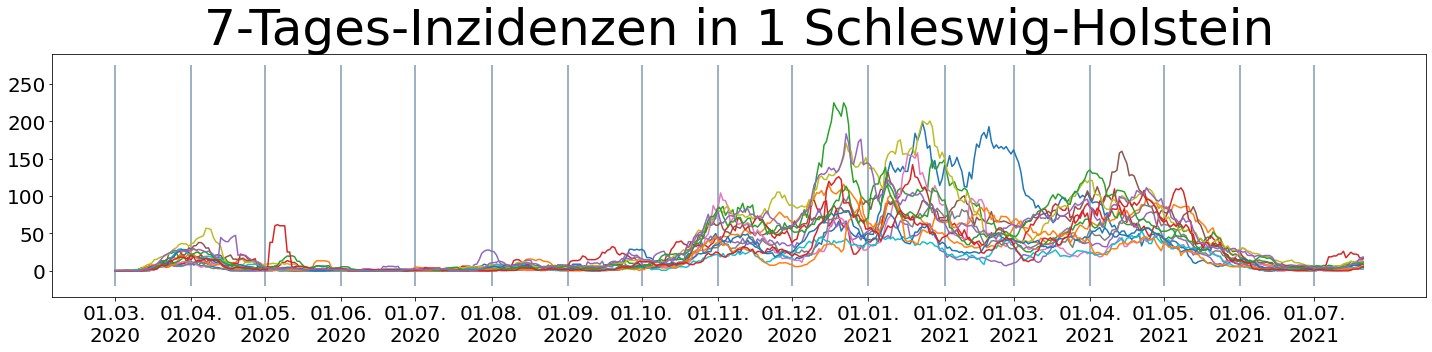

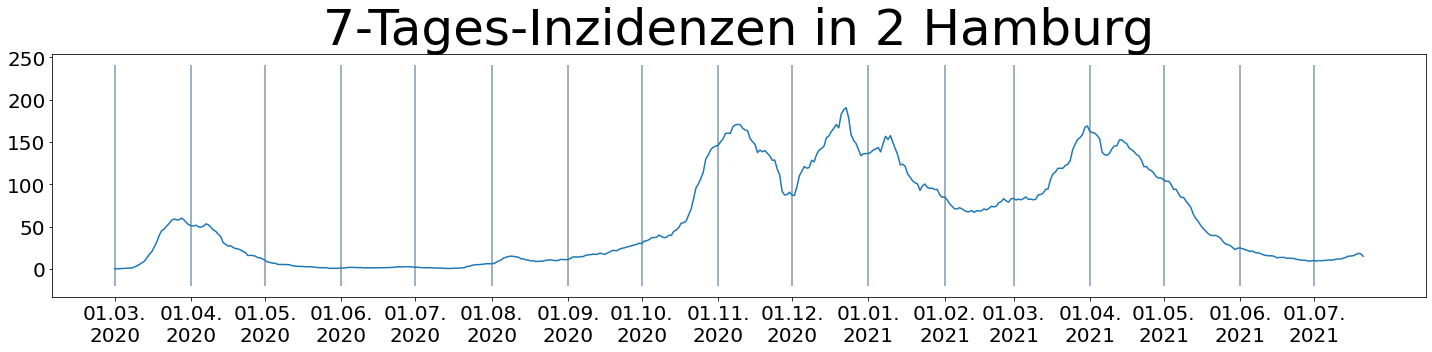

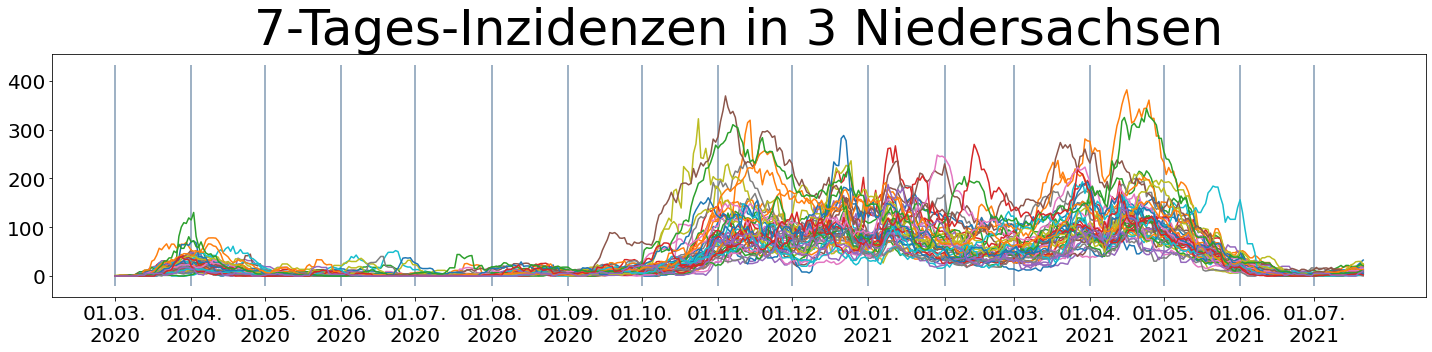

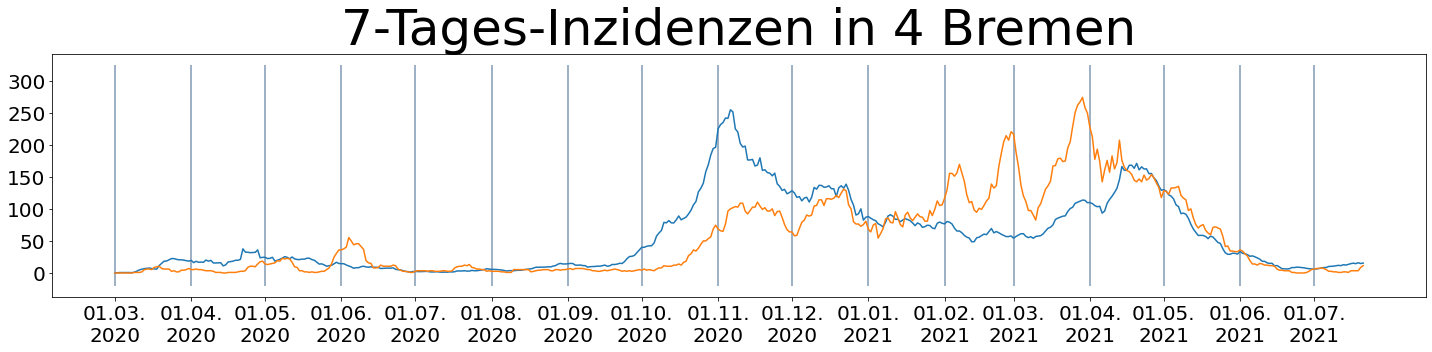

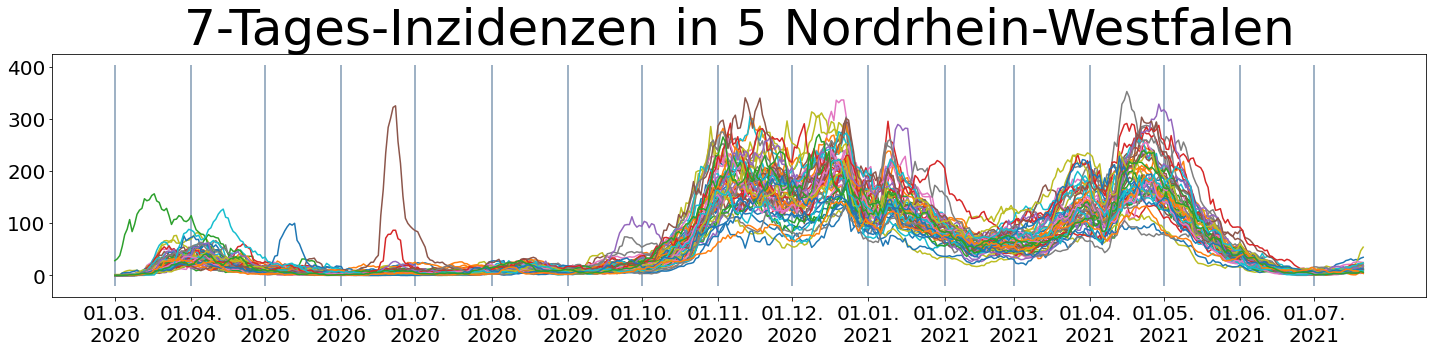

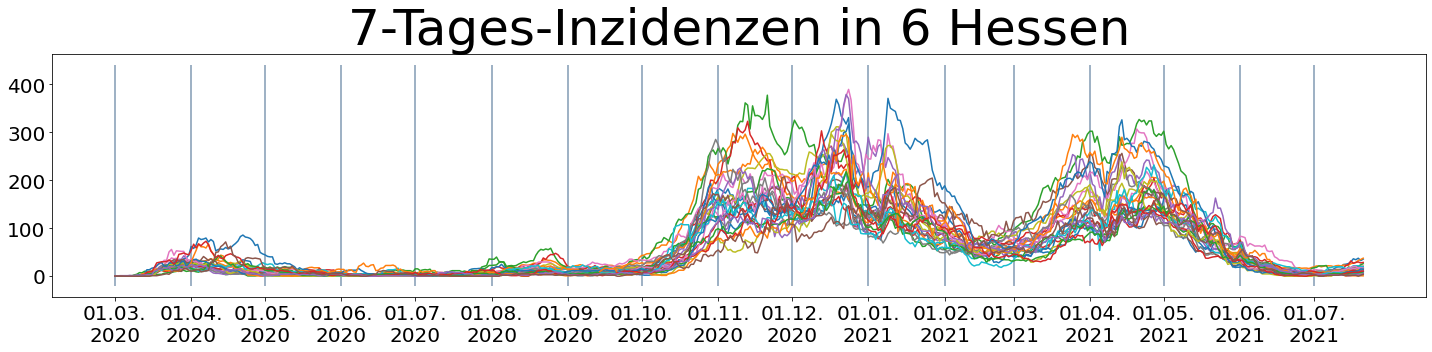

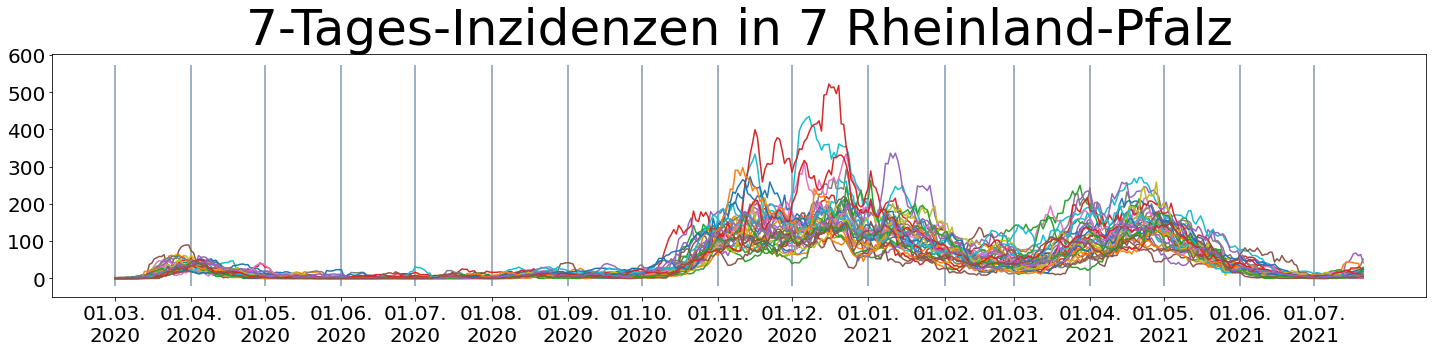

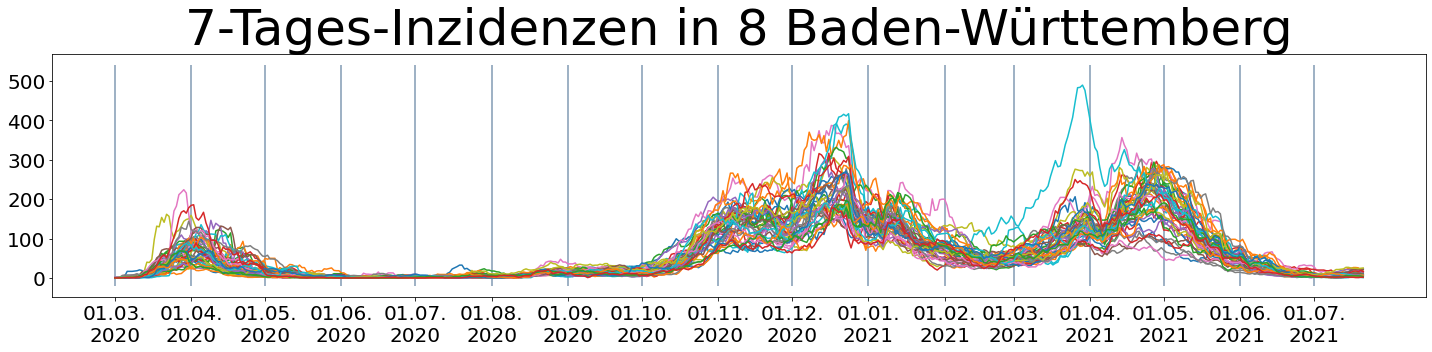

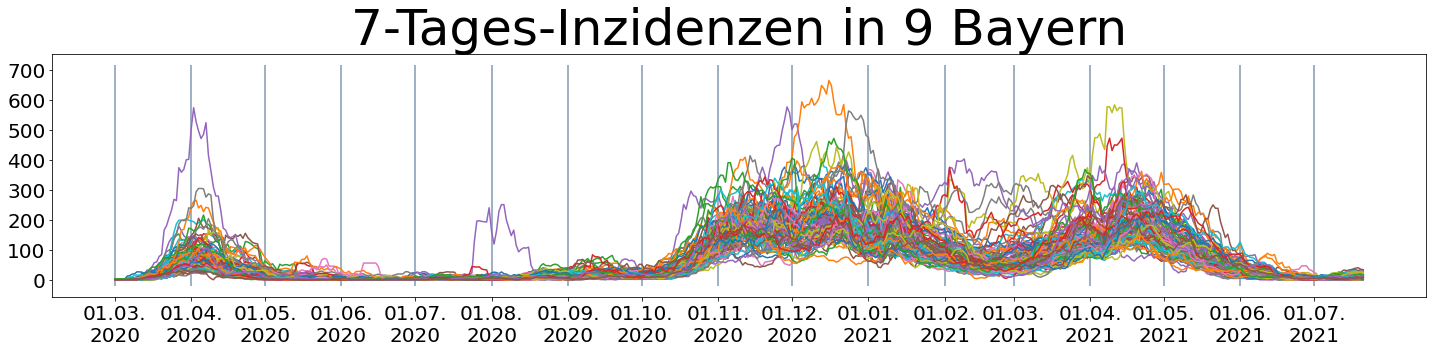

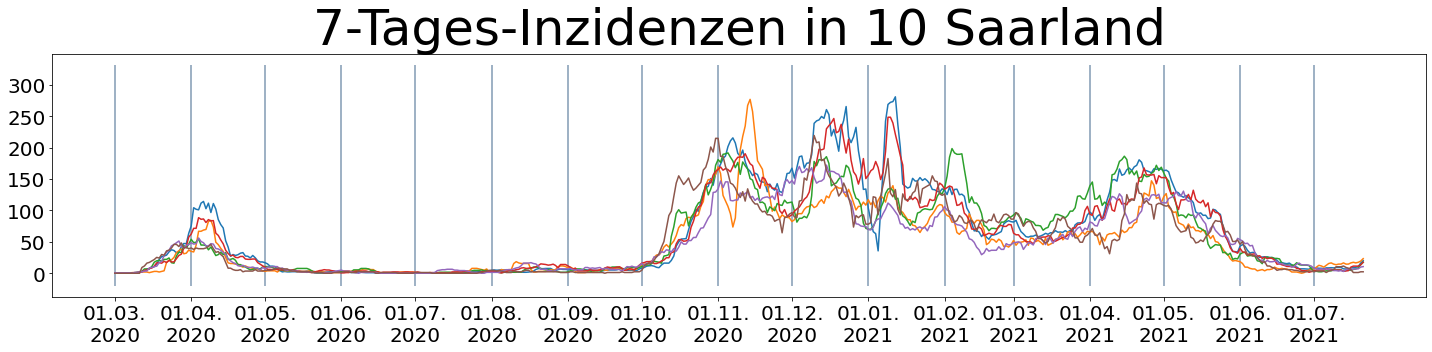

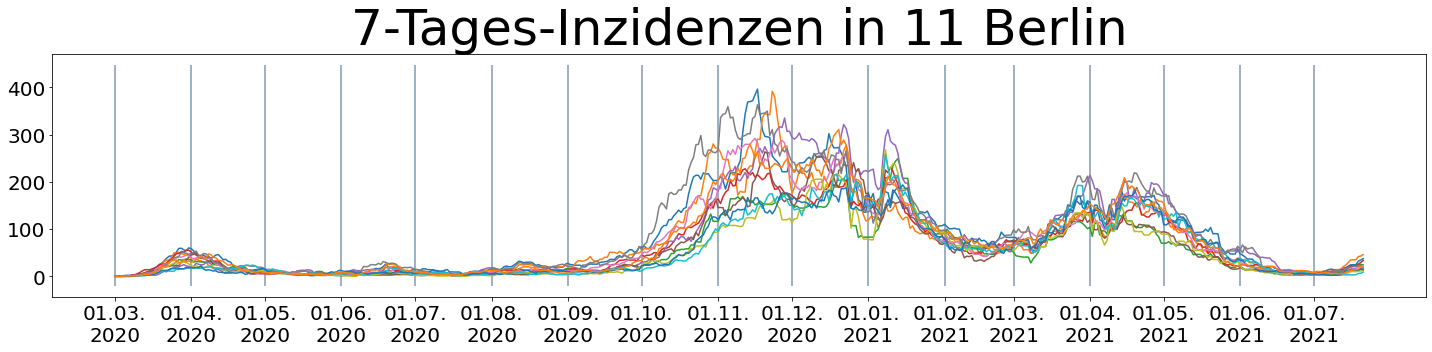

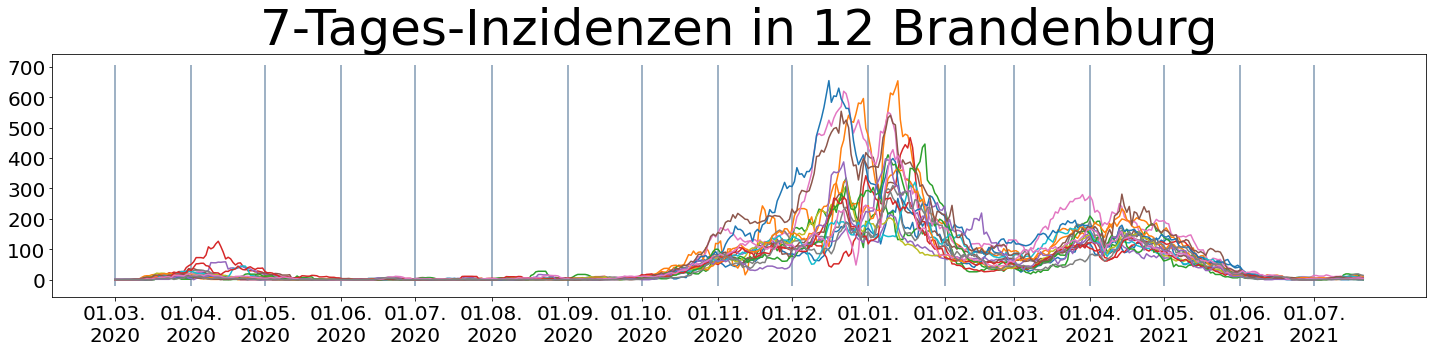

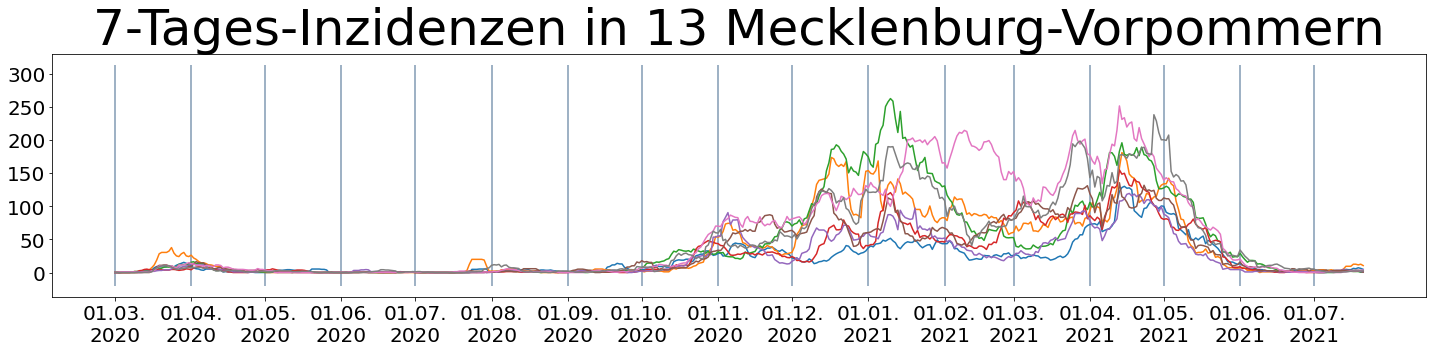

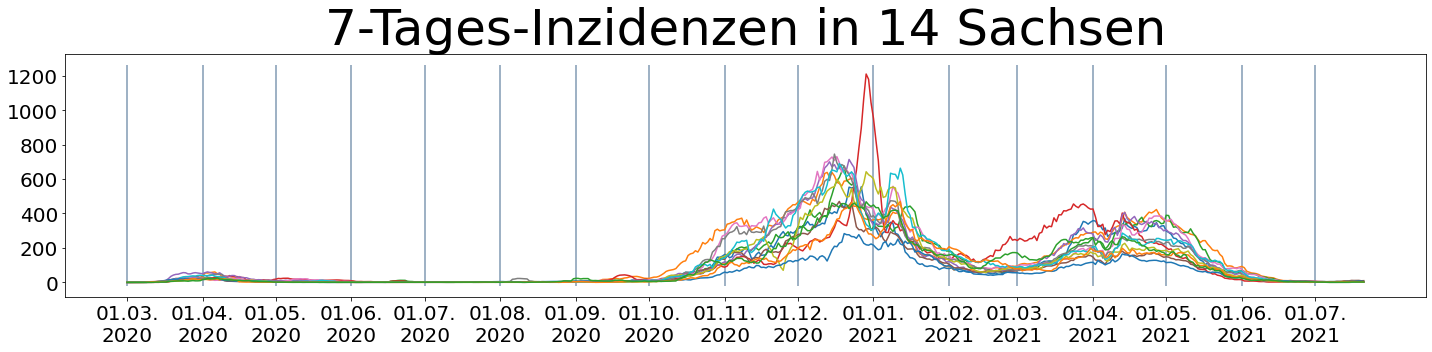

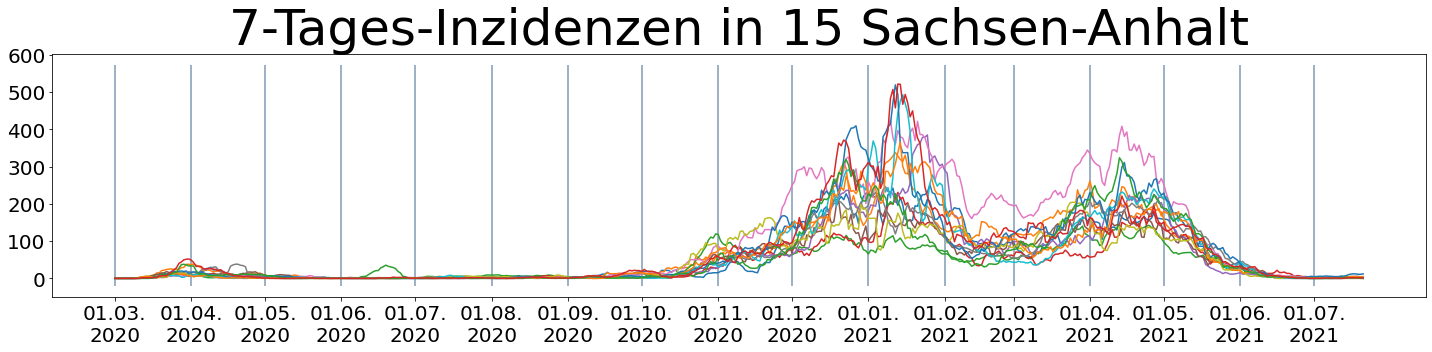

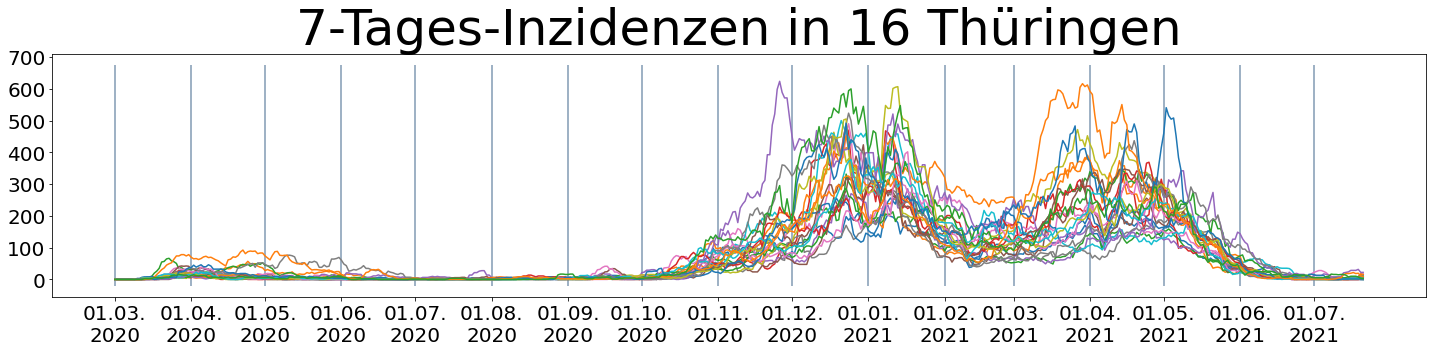

In [7]:
covid19_keys_copy = list(covid19.keys())
for stateID, state in non_county_specific_data['states'].items():
    plt.figure(figsize=(20, 5))    # initiate and enlarge plot

    highest_incidence=0
    for AdmUnitID, county in covid19.items():
        if AdmUnitID[:-3] == stateID:
            plt.plot(non_county_specific_data["unixtime"], county['incidences'])
            covid19_keys_copy.remove(AdmUnitID)
            if max(county['incidences'])> highest_incidence:
                highest_incidence = max(county['incidences'])

    plt.yticks(fontsize=20)
    plt.xticks(firsts_of_month_unixtime, firsts_of_month_UTC,# rotation='vertical',
              fontsize=20)
    plt.vlines(firsts_of_month_unixtime, -20, highest_incidence+50, color=(0.5, 0.6, 0.7))
    plt.title("7-Tages-Inzidenzen in {} {}".format(stateID, state), fontsize=50)

    os.chdir(".."), os.chdir("..")    # move to correct directory
    # check if the needed directory is available - otherwise create it
    if not(os.path.isdir("results")): os.makedirs("results")
    os.chdir("results")    # move into result directory
    if not(os.path.isdir("incidences")): os.makedirs("incidences")
    plt.tight_layout()
    plt.savefig("incidences/"+stateID+"_"+state+".png", facecolor="darkgrey")
    os.chdir(plot_incidences_directory)    # return to original directory

In [8]:
if len(covid19_keys_copy) != 0:
    print('There seems to be at least one county being unrelated to any federal state:')
    for AdmUnitID in covid19_keys_copy:
        print(AdmUnitID + " " + counties_geography[AdmUnitId]['name'])

## Plot Data of One State
The user can choose one federal state in the first cell below.
Afterwards the development of the seven days incidence of each county in the federal state is plotted.

In [9]:
state_ID = "13"
print("You have chosen {} {}.".format(state_ID, non_county_specific_data['states'][state_ID]))

You have chosen 13 Mecklenburg-Vorpommern.


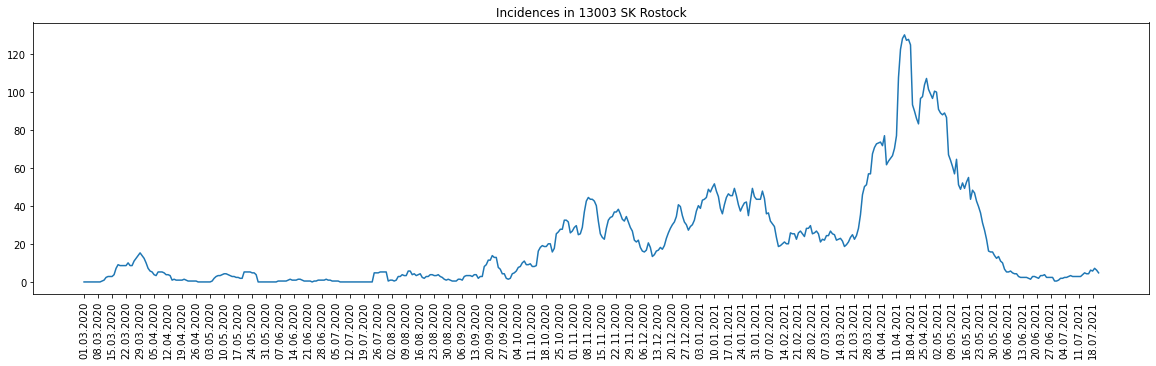

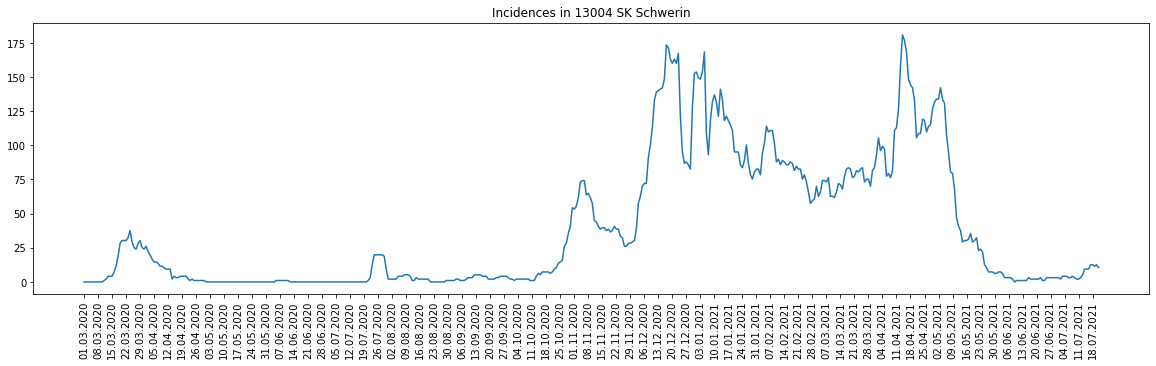

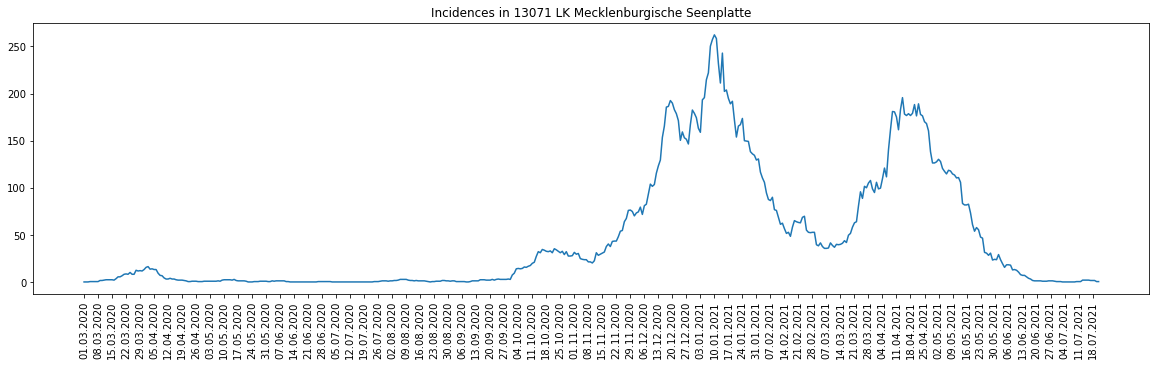

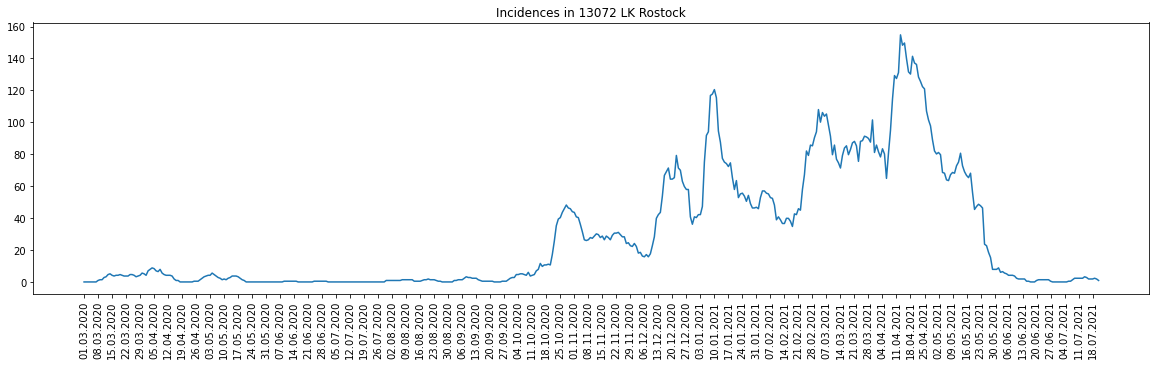

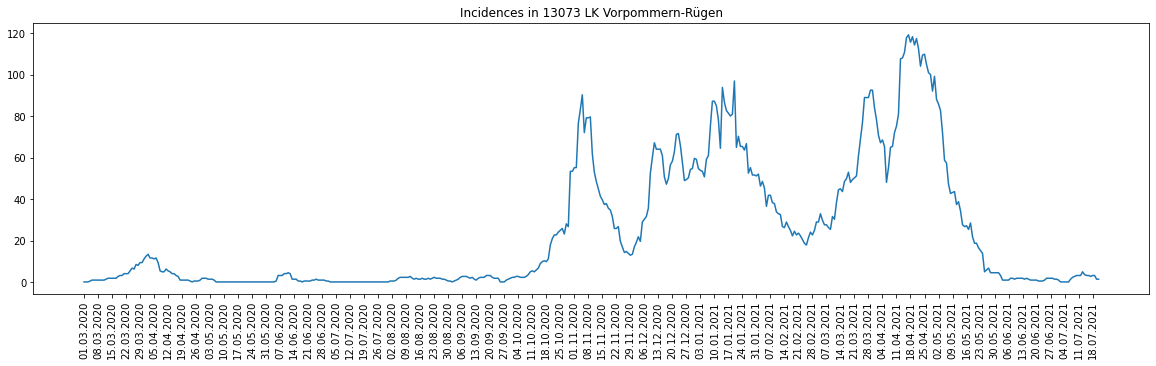

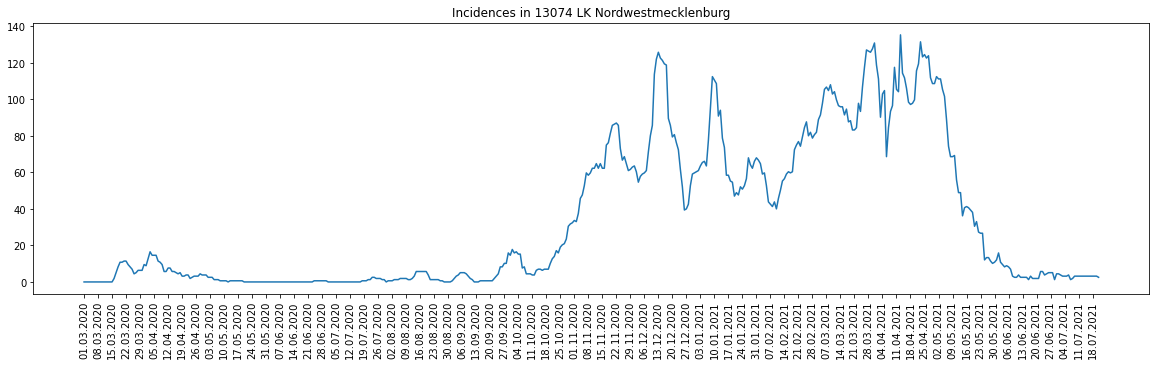

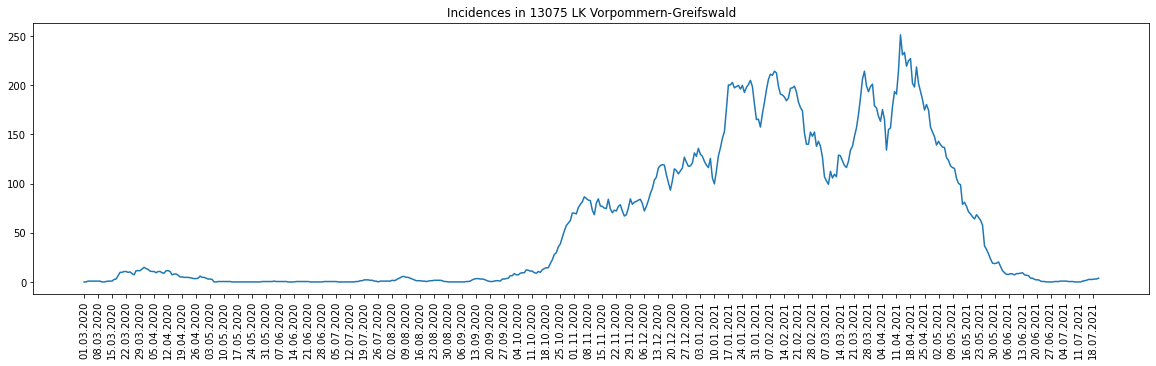

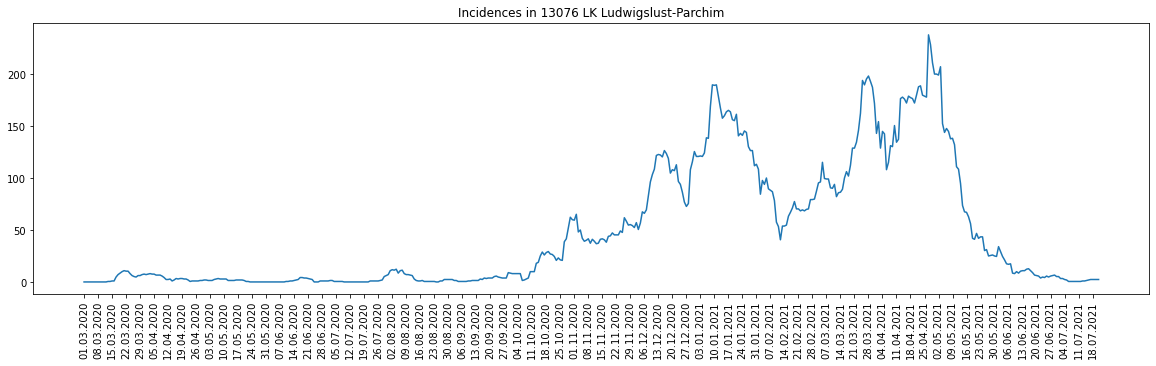

In [10]:
for AdmUnitID, county in covid19.items():
    if AdmUnitID[:-3] == state_ID:
        plt.figure(figsize=(20, 5))    # enlarge plot
        plt.xticks(non_county_specific_data["unixtime"][::7],
                   non_county_specific_data['UTC'][::7], rotation='vertical')
        plt.plot(non_county_specific_data["unixtime"], county['incidences'])
        plt.title("Incidences in " + AdmUnitID + " " + counties_geography[AdmUnitID]['name'])
        plt.show()

## Plot the Incidence of Germany
The incidences of all counties are summed up and plotted over the time.

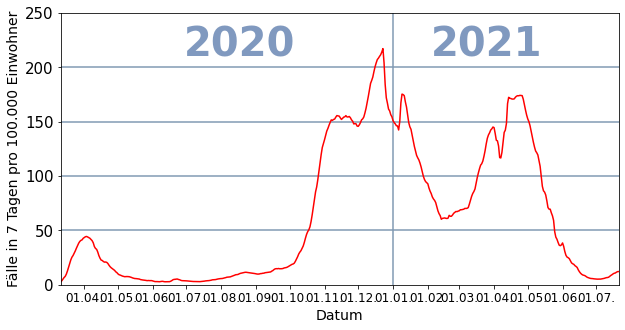

In [11]:
plt.figure(figsize=(10, 5))    # enlarge plot

# axis
plt.ylabel("Fälle in 7 Tagen pro 100.000 Einwohner", fontsize=14)
plt.yticks(fontsize=15)
plt.ylim(0, 250)

plt.xlim(non_county_specific_data["unixtime"][10],
        non_county_specific_data["unixtime"][-1])
first_days_of_months = list()
first_days_of_months_unix = list()
for date_index in range(len(non_county_specific_data['UTC'])):
    if non_county_specific_data['UTC'][date_index][:3] == "01.":
        first_days_of_months.append(non_county_specific_data['UTC'][date_index])
        first_days_of_months_unix.append(non_county_specific_data["unixtime"][date_index])
    if non_county_specific_data['UTC'][date_index] == "01.01.2021":
        new_year_date = non_county_specific_data["unixtime"][date_index]
plt.xticks(first_days_of_months_unix[1:],
           [e[:-4] for e in first_days_of_months[1:]], fontsize=12)
plt.xlabel("Datum", fontsize=14)

plt.hlines([50,100,150,200], non_county_specific_data["unixtime"][0],
        non_county_specific_data["unixtime"][-1], color=(0.5, 0.6, 0.7))
plt.vlines([new_year_date], 0, 250, color=(0.5, 0.6, 0.7))

plt.text(non_county_specific_data["unixtime"][120], 210, "2020",
         fontweight=1000, fontsize=40, color=(0.5, 0.6, 0.75))

plt.text(non_county_specific_data["unixtime"][340], 210, "2021",
         fontweight=1000, fontsize=40, color=(0.5, 0.6, 0.75))
plt.plot(non_county_specific_data["unixtime"], non_county_specific_data['incidences_germany'], color="r")

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.savefig("results/Inzidenz_Deutschland.png")
os.chdir(plot_incidences_directory)    # return to original directory

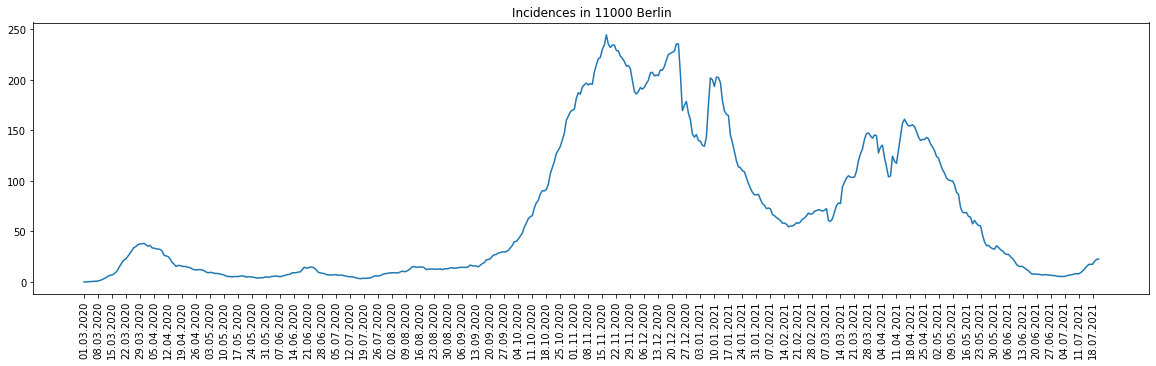

In [12]:

plt.figure(figsize=(20, 5))    # enlarge plot
plt.xticks(non_county_specific_data["unixtime"][::7],
           non_county_specific_data['UTC'][::7], rotation='vertical')
plt.plot(non_county_specific_data["unixtime"], districts["110"]['incidences'])
plt.title("Incidences in 11000 Berlin")
plt.show()

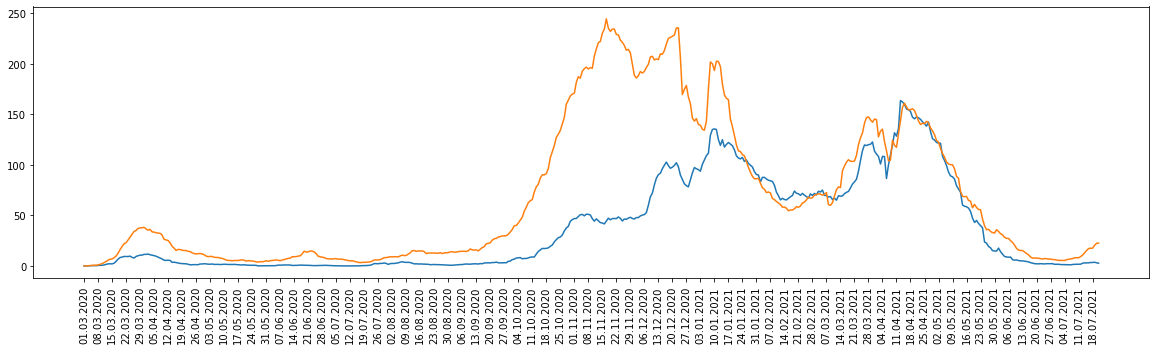

In [13]:
plt.figure(figsize=(20, 5))    # enlarge plot
plt.xticks(non_county_specific_data["unixtime"][::7],
           non_county_specific_data['UTC'][::7], rotation='vertical')
for AdmUnitID, district in districts.items():
    if AdmUnitID == "110" or  AdmUnitID == "130":
        plt.plot(non_county_specific_data["unixtime"], district['incidences'])
plt.show()

In [14]:
len(np.correlate(districts["110"]["incidences"],
             districts["130"]["incidences"],mode="full"))

1015

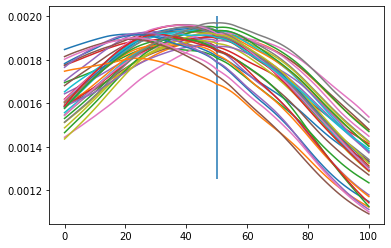

In [15]:
for correlation in districts["110"]["correlation"].values():
    plt.plot(correlation)
plt.vlines(50, 0.00125, 0.002)
plt.show()

C:\Users\leand\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


75.41880086771596   11001  SK Berlin Mitte
58.49839927107449   11002  SK Berlin Friedrichshain-Kreuzberg
50.23908421326491   11004  SK Berlin Charlottenburg-Wilmersdorf
64.07780625680279   11007  SK Berlin Tempelhof-Schöneberg
98.40466114230372   11008  SK Berlin Neukölln
75.57914718599501   3453  LK Cloppenburg
64.41945467531194   3460  LK Vechta
60.17711832438161   5120  SK Remscheid
96.71179883945841   5915  SK Hamm
58.55537216065393   6412  SK Frankfurt am Main
56.033159349094255   6413  SK Offenbach
51.960285893716915   8116  LK Esslingen


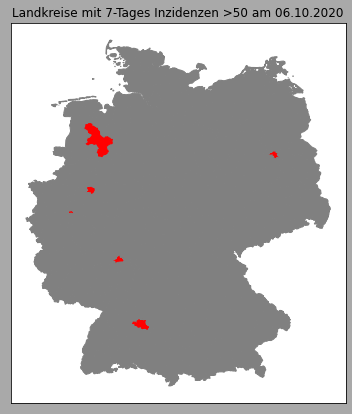

In [16]:
plt.figure(figsize=(6, 7), facecolor='darkgrey')    # enlarge plot
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
october6 = non_county_specific_data["UTC"].index("06.10.2020")
plt.title("Landkreise mit 7-Tages Inzidenzen >50 am 06.10.2020")
counties_above_50 = 0
for AdmUnitId, county in covid19.items():
    colour="grey"
    if county["incidences"][october6] > 50:
        counties_above_50 += 1
        print(str(county["incidences"][october6]) + "   " +
             AdmUnitId + "  " + counties_geography[AdmUnitId]["name"])
        colour="red"
    for polygon in counties_geography[AdmUnitId]['geometry']:
        x, y = np.array(polygon).T
        plt.fill(x, y, color=colour)

C:\Users\leand\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


82.34773663648139   11001  SK Berlin Mitte
68.42540035949925   11002  SK Berlin Friedrichshain-Kreuzberg
72.85558793581686   11007  SK Berlin Tempelhof-Schöneberg
117.08909047312089   11008  SK Berlin Neukölln
51.649808328456956   14521  LK Erzgebirgskreis
105.45927514324885   3453  LK Cloppenburg
58.112150333074375   3454  LK Emsland
56.86706230588647   3456  LK Grafschaft Bentheim
50.42402016960807   3458  LK Oldenburg
70.72135785007072   3460  LK Vechta
58.70200828601425   3461  LK Wesermarsch
57.79134856464262   4011  SK Bremen
61.07528426952164   5120  SK Remscheid
54.632497887918895   5124  SK Wuppertal
56.17798882799996   5914  SK Hagen
80.03735076368972   5915  SK Hamm
51.15335624260872   5978  LK Unna
58.55537216065393   6412  SK Frankfurt am Main
68.31439975437519   6413  SK Offenbach
57.00678848051676   8116  LK Esslingen
52.15419501133787   9764  SK Memmingen


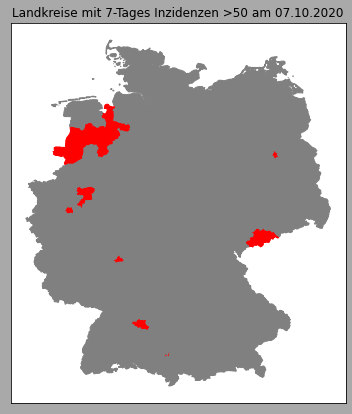

In [17]:
plt.figure(figsize=(6, 7), facecolor='darkgrey')    # enlarge plot
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
october7 = non_county_specific_data["UTC"].index("07.10.2020")
plt.title("Landkreise mit 7-Tages Inzidenzen >50 am 07.10.2020")
counties_above_50 = 0
for AdmUnitId, county in covid19.items():
    colour="grey"
    if county["incidences"][october7] > 50:
        counties_above_50 += 1
        print(str(county["incidences"][october7]) + "   " +
             AdmUnitId + "  " + counties_geography[AdmUnitId]["name"])
        colour="red"
    for polygon in counties_geography[AdmUnitId]['geometry']:
        x, y = np.array(polygon).T
        plt.fill(x, y, color=colour)

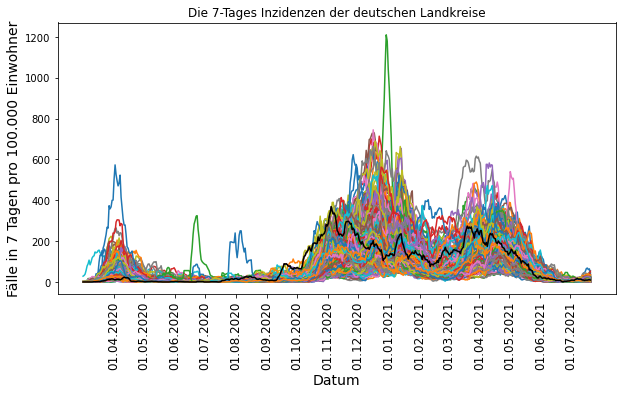

In [18]:
plt.figure(figsize=(10, 5))    # enlarge plot
plt.xticks(first_days_of_months_unix[1:],
           [e for e in first_days_of_months[1:]], rotation="vertical", fontsize=12)
plt.xlabel("Datum", fontsize=14)
plt.ylabel("Fälle in 7 Tagen pro 100.000 Einwohner", fontsize=14)

for AdmUnitId, county in covid19.items():
    plt.plot(non_county_specific_data["unixtime"], county["incidences"])
plt.title("Die 7-Tages Inzidenzen der deutschen Landkreise")
plt.plot(non_county_specific_data["unixtime"],
         covid19["3453"]["incidences"], color="black")

82.34773663648139   11001  SK Berlin Mitte
68.42540035949925   11002  SK Berlin Friedrichshain-Kreuzberg
72.85558793581686   11007  SK Berlin Tempelhof-Schöneberg
117.08909047312089   11008  SK Berlin Neukölln
51.649808328456956   14521  LK Erzgebirgskreis
105.45927514324885   3453  LK Cloppenburg
58.112150333074375   3454  LK Emsland
56.86706230588647   3456  LK Grafschaft Bentheim
50.42402016960807   3458  LK Oldenburg
70.72135785007072   3460  LK Vechta
58.70200828601425   3461  LK Wesermarsch
57.79134856464262   4011  SK Bremen
61.07528426952164   5120  SK Remscheid
54.632497887918895   5124  SK Wuppertal
56.17798882799996   5914  SK Hagen
80.03735076368972   5915  SK Hamm
51.15335624260872   5978  LK Unna
58.55537216065393   6412  SK Frankfurt am Main
68.31439975437519   6413  SK Offenbach
57.00678848051676   8116  LK Esslingen
52.15419501133787   9764  SK Memmingen


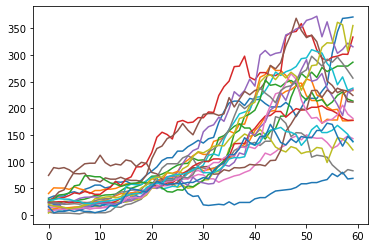

In [19]:
october7 = non_county_specific_data["UTC"].index("07.10.2020")
for AdmUnitId, county in covid19.items():
    if county["incidences"][october7] > 50:
        print(str(county["incidences"][october7]) + "   " +
             AdmUnitId + "  " + counties_geography[AdmUnitId]["name"])
        plt.plot(county["incidences"][october7-20:october7+40])

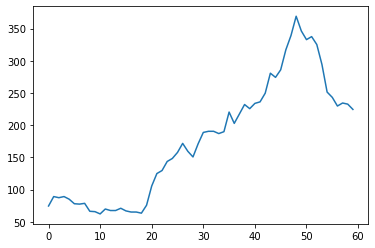

In [20]:
plt.plot(covid19["3453"]["incidences"][october7-20:october7+40])

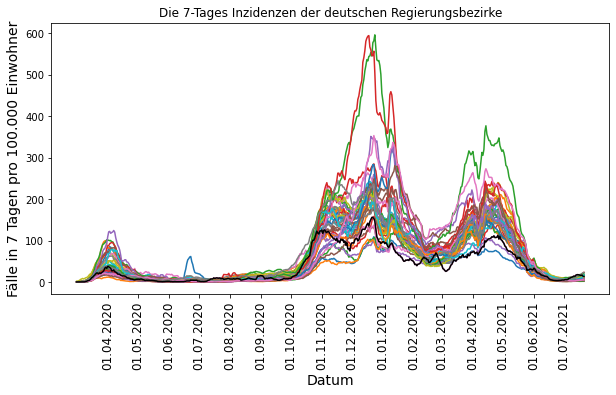

In [21]:
plt.figure(figsize=(10, 5))    # enlarge plot
plt.xticks(first_days_of_months_unix[1:],
           [e for e in first_days_of_months[1:]], rotation="vertical", fontsize=12)
plt.xlabel("Datum", fontsize=14)
plt.ylabel("Fälle in 7 Tagen pro 100.000 Einwohner", fontsize=14)
plt.title("Die 7-Tages Inzidenzen der deutschen Regierungsbezirke")
for district in districts.values():
    plt.plot(non_county_specific_data["unixtime"], district["incidences"])
plt.plot(non_county_specific_data["unixtime"],
         districts["72"]["incidences"], color="black")

In [22]:
def get_week_day(UTC):
    if(UTC == 0): return "Sonntag"
    if(UTC == 1): return "Montag"
    if(UTC == 2): return "Dienstag"
    if(UTC == 3): return "Mittwoch"
    if(UTC == 4): return "Donnerstag"
    if(UTC == 5): return "Freitag"
    if(UTC == 6): return "Samstag"
    else: return "Invalid day"

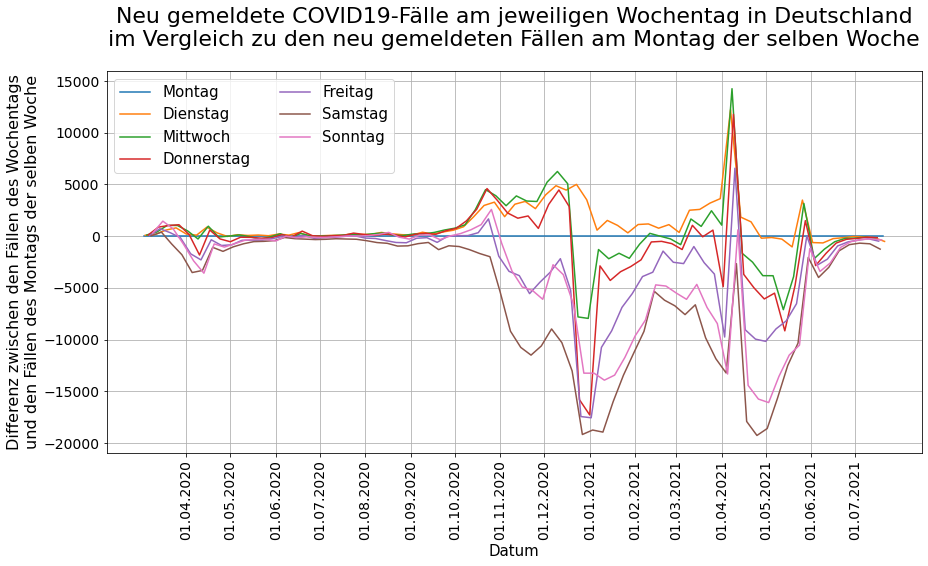

In [23]:
plt.figure(figsize=(13, 8))    # enlarge plot
plt.xticks(first_days_of_months_unix[1:],
           [e for e in first_days_of_months[1:]], rotation="vertical", fontsize=14)
plt.xlabel("Datum", fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel("Differenz zwischen den Fällen des Wochentags\n" +
           "und den Fällen des Montags der selben Woche", fontsize=16)
#plt.text(y_axis[0],30000,"  ")    # to get the whole title to the saved file
plt.title("Neu gemeldete COVID19-Fälle am jeweiligen Wochentag in Deutschland\n" +
          "im Vergleich zu den neu gemeldeten Fällen am Montag der selben Woche",
          fontsize=22, y=1.05)
plt.grid()
cases = non_county_specific_data["cases_germany"]
for day in [2,3,4,5,6,7,8]:
    y_axis = non_county_specific_data["unixtime"][day::7]
    plt.plot(y_axis, [cases[day::7][i] - cases[day-1::7][i] -
             (cases[2::7][i] - cases[1::7][i]) for i in range(len(y_axis))],
             label=get_week_day(datetime.date.fromtimestamp(y_axis[0] //1000).weekday()))
plt.legend(ncol=2, fontsize=15)

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.tight_layout()
plt.savefig("results/neue_Fälle_pro_Wochentag_Deutschland.png")
os.chdir(plot_incidences_directory)    # return to original directory

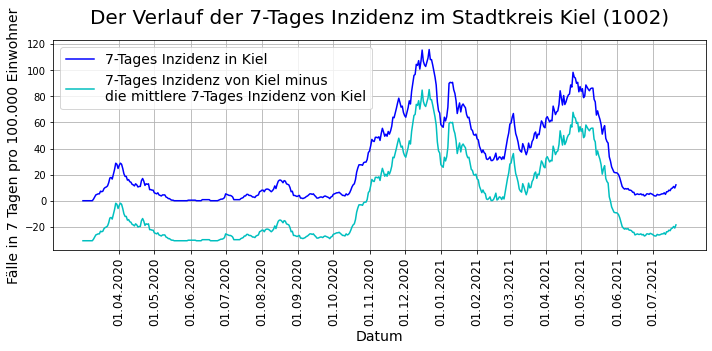

In [24]:
plt.figure(figsize=(10, 5))    # enlarge plot
plt.xticks(first_days_of_months_unix[1:],
           [e for e in first_days_of_months[1:]], rotation="vertical", fontsize=12)
plt.xlabel("Datum", fontsize=14)
plt.ylabel("Fälle in 7 Tagen pro 100.000 Einwohner", fontsize=14)
plt.title("Der Verlauf der 7-Tages Inzidenz im Stadtkreis Kiel (1002)",
          fontsize=20, y=1.05)
plt.grid()

plt.plot(non_county_specific_data["unixtime"],
         covid19["1002"]["incidences"], color="blue",
         label="7-Tages Inzidenz in Kiel")
plt.plot(non_county_specific_data["unixtime"],
         covid19["1002"]["incidences_scaled"], color="c",
         label="7-Tages Inzidenz von Kiel minus\ndie mittlere 7-Tages Inzidenz von Kiel")
plt.legend(fontsize=14)


os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.tight_layout()
plt.savefig("results/Inzidenz_Kiel.png")
os.chdir(plot_incidences_directory)    # return to original directory

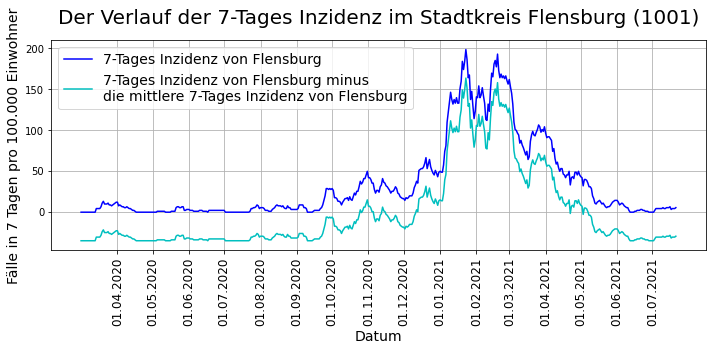

In [25]:
plt.figure(figsize=(10, 5))    # enlarge plot
plt.xticks(first_days_of_months_unix[1:],
           [e for e in first_days_of_months[1:]], rotation="vertical", fontsize=12)
plt.xlabel("Datum", fontsize=14)
plt.ylabel("Fälle in 7 Tagen pro 100.000 Einwohner", fontsize=14)
plt.title("Der Verlauf der 7-Tages Inzidenz im Stadtkreis Flensburg (1001)",
          fontsize=20, y=1.05)
plt.grid()

plt.plot(non_county_specific_data["unixtime"],
         covid19["1001"]["incidences"], color="blue",
         label="7-Tages Inzidenz von Flensburg")
plt.plot(non_county_specific_data["unixtime"],
         covid19["1001"]["incidences_scaled"], color="c",
         label="7-Tages Inzidenz von Flensburg minus\n"+
         "die mittlere 7-Tages Inzidenz von Flensburg")
plt.legend(fontsize=14)

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.tight_layout()
plt.savefig("results/Inzidenz_Flensburg.png")
os.chdir(plot_incidences_directory)    # return to original directory

In [26]:
input_array1_scaled = covid19["1001"]["incidences_scaled"]
input_array2_scaled = covid19["1002"]["incidences_scaled"]

input_array1, input_array2 = covid19["1001"]["incidences"], covid19["1002"]["incidences"]
position_array2_to_array1 = ([e for e in range(-507, 508)])
number_of_products = ([e for e in range(1, len(input_array1))] +
                      [e for e in range(len(input_array1), 0, -1)])

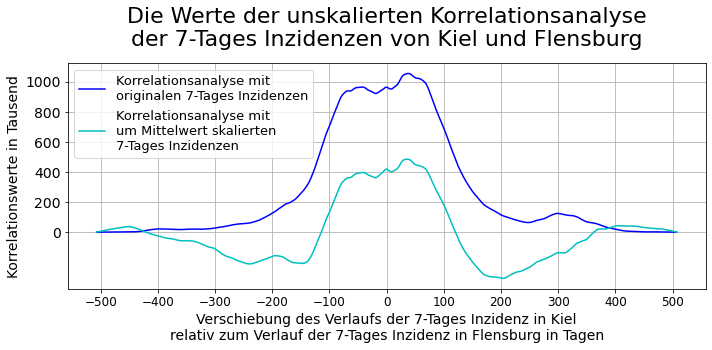

In [27]:
plt.figure(figsize=(10, 5))    # enlarge plot
plt.xticks([-500,-400,-300,-200,-100,0,100,200,300,400,500], fontsize=12)
plt.xlabel("Verschiebung des Verlaufs der 7-Tages Inzidenz in Kiel\n"+
           "relativ zum Verlauf der 7-Tages Inzidenz in Flensburg in Tagen",
           fontsize=14)
plt.yticks([0,200000,400000,600000,800000,1000000],
           [0,200,400,600,800,1000],
           fontsize=14)
plt.ylabel("Korrelationswerte in Tausend", fontsize=14)
plt.title("Die Werte der unskalierten Korrelationsanalyse\n"+
          "der 7-Tages Inzidenzen von Kiel und Flensburg",
          fontsize=22, y=1.05)
plt.grid()

plt.plot(position_array2_to_array1,
         np.correlate(input_array1, input_array2, mode="full"), color="blue",
         label="Korrelationsanalyse mit\noriginalen 7-Tages Inzidenzen")

plt.plot(position_array2_to_array1,
         np.correlate(input_array1_scaled, input_array2_scaled, mode="full"),
         color="c",
         label="Korrelationsanalyse mit\num Mittelwert skalierten\n7-Tages Inzidenzen")

plt.legend(loc='upper left', fontsize=13)

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.tight_layout()
plt.savefig("results/correlation_Flensburg_Kiel.png")
os.chdir(plot_incidences_directory)    # return to original directory

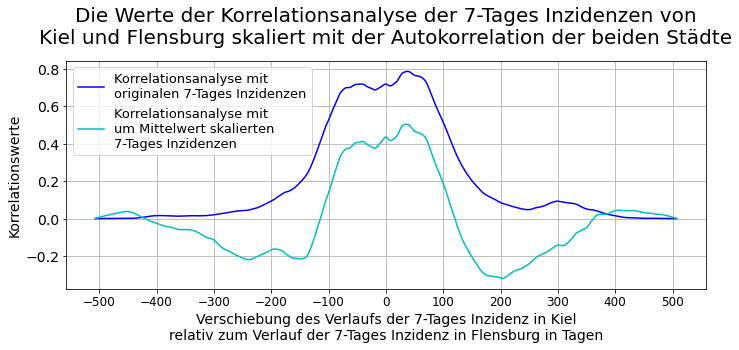

In [28]:
plt.figure(figsize=(10, 5))    # enlarge plot
plt.xticks([-500,-400,-300,-200,-100,0,100,200,300,400,500], fontsize=12)
plt.xlabel("Verschiebung des Verlaufs der 7-Tages Inzidenz in Kiel\n"+
           "relativ zum Verlauf der 7-Tages Inzidenz in Flensburg in Tagen",
           fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Korrelationswerte", fontsize=14)
plt.title("Die Werte der Korrelationsanalyse der 7-Tages Inzidenzen von\n" +
          "Kiel und Flensburg skaliert mit der Autokorrelation der beiden Städte",
          fontsize=20, y=1.05)
plt.grid()

autocorrelation_a1 = np.correlate(input_array1,input_array1)
array1 = [e/math.sqrt(autocorrelation_a1) for e in input_array1]
autocorrelation_a2 = np.correlate(input_array2,input_array2)
array2 = [e/math.sqrt(autocorrelation_a2) for e in input_array2]
correlations = np.correlate(array1, array2, mode="full")
plt.plot(position_array2_to_array1, correlations,
         color="blue",
         label="Korrelationsanalyse mit\noriginalen 7-Tages Inzidenzen")


autocorrelation_a1_scaled = np.correlate(input_array1_scaled,input_array1_scaled)
array1_scaled = [e/math.sqrt(autocorrelation_a1) for e in input_array1_scaled]
autocorrelation_a2_scaled = np.correlate(input_array2_scaled,input_array2_scaled)
array2_scaled = [e/math.sqrt(autocorrelation_a2_scaled) for e in input_array2_scaled]
correlations_scaled = np.correlate(array1_scaled, array2_scaled, mode="full")
plt.plot(position_array2_to_array1, correlations_scaled,
         color="c",
         label="Korrelationsanalyse mit\num Mittelwert skalierten\n7-Tages Inzidenzen")

plt.legend(loc='upper left', fontsize=13)

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.tight_layout()
plt.savefig("results/correlation_Flensburg_Kiel_scaled_autocorrelation.png")
os.chdir(plot_incidences_directory)    # return to original directory

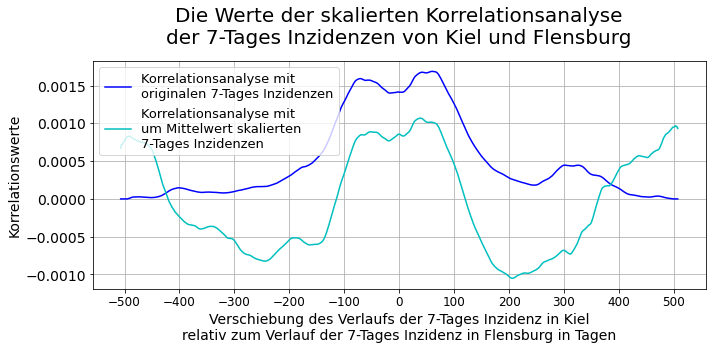

In [29]:
plt.figure(figsize=(10, 5))    # enlarge plot
plt.xticks([-500,-400,-300,-200,-100,0,100,200,300,400,500], fontsize=12)
plt.xlabel("Verschiebung des Verlaufs der 7-Tages Inzidenz in Kiel\n"+
           "relativ zum Verlauf der 7-Tages Inzidenz in Flensburg in Tagen",
           fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Korrelationswerte", fontsize=14)
plt.title("Die Werte der skalierten Korrelationsanalyse\n" +
          "der 7-Tages Inzidenzen von Kiel und Flensburg",
          fontsize=20, y=1.05)
plt.grid()

plt.plot(position_array2_to_array1,
         [correlations[i] / number_of_products[i] for i in range(len(correlations))],
         color="blue",
         label="Korrelationsanalyse mit\noriginalen 7-Tages Inzidenzen")

plt.plot(position_array2_to_array1,
         [correlations_scaled[i] / number_of_products[i]
          for i in range(len(correlations))],
         color="c",
         label="Korrelationsanalyse mit\num Mittelwert skalierten\n7-Tages Inzidenzen")

plt.legend(loc='upper left', fontsize=13)


os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
plt.tight_layout()
plt.savefig("results/correlation_Flensburg_Kiel_scaled_complete.png")
os.chdir(plot_incidences_directory)    # return to original directory